# Topic 3 : Parameters

## Introduction

In this notebook, the numpy polyfit function is used to fit polynomials to two data sets. These data sets are as follows:


Data Set 1:

```python 
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
y = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7]
```
Data Set 2:

```python 
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
y = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6]
```

#### Overview of Polynomials

The word polynomial comes from poly (meaning many) and nomial (meaning term); hence, polynomial functions can be considered algebraic expressions with manterms. Terms are variables, real numbers or a multiplication of one or more variables, and separated by addition or subtraction signs.

Below are some examples of polynomials with varying numbers of terms.

##### Mononomial (one term) :  $3xy^2$

##### Binomial (two terms) : $4x - 1$

##### Trinomial (three terms)  : $3x + y -2$

Certain conditions must be satisfied for an expression to be considered a polynomial; exponents must be whole, positive numbers, and the expression cannot include division by a variable.

#### Linear vs Polynomial Regression.

Linear regression is used to estimate the relationship between two quantitative variables by fitting a straight line to the observed data. 

Conversely, polynomial regression is a method of determining the relationship between an independent variable (x) and a dependent variable (y), and modelling this relationship as the nth degree polynomial, where degrees refer to the highest power of the variables in the function. 

Polynomial regression is used in scenarios where the relationship between x and y is not linear, and the line of best fit is closer to a curve. A polynomial regression model can be developed using Least Squares Fitting; this is a procedure for finding the best-fitting curve for a given dataset by minimizing the sum of the squares of the offsets of the points from the curve. 

#### NumPy Polyfit

The numpy polyfit function fits a polynomial of degree deg to points x and y using Least Squares fitting. It returns a single-dimensional array of coefficients that minimize the squared error of the polynomial. Coefficients are the numbers that come before a term. For example in the polynomial $2x +3y^2$, the coefficients would be 2 and 3. The coefficients are returned as an ordered list, beginning with the leading coefficient. This is the coefficient for the leading term, i.e. the term containing the highest power in the function. In the previous example, the coefficient for $3y^2$ would be returned first.

## Part 1 : Plot Data Sets

The below code plots the points for the two data sets.

### 1.1 Import Libraries and Initiate Data Sets

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Data Sets to Plot

x1 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
y1 = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7]


x2 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
y2 = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6]
print(len(y2))

13


### 1.2 Plot First Data Set

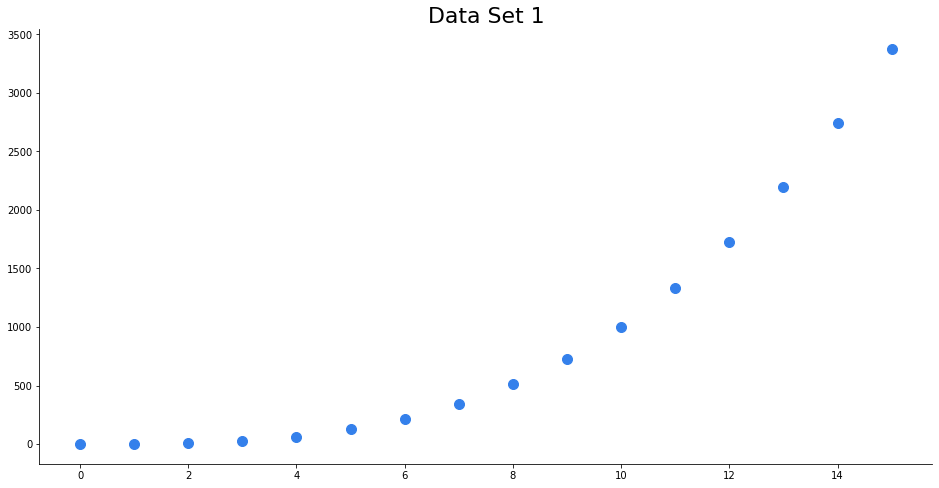

In [45]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(x1, y1, ".", color = "#3480eb", markersize = 20);
ax.spines[['right', 'top']].set_visible(False)
ax.set_title("Data Set 1", fontsize = 22);

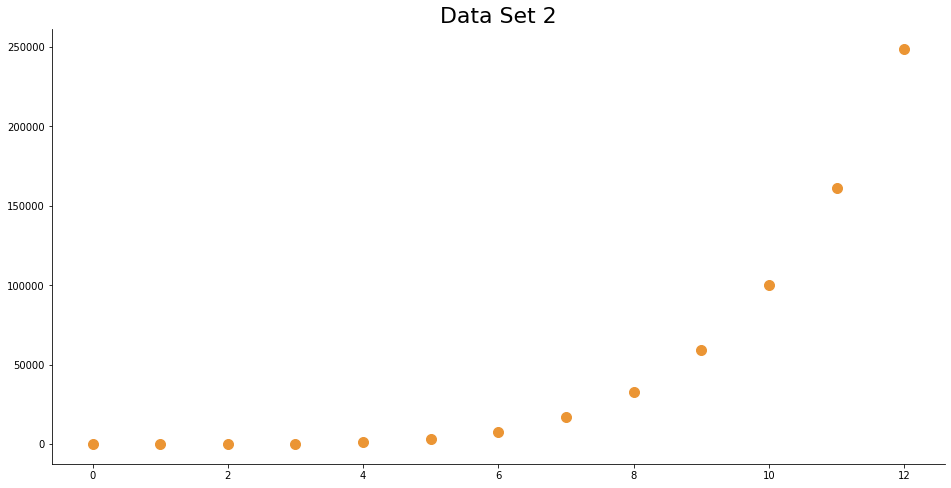

In [46]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(x2, y2, ".", color = "#eb9534", markersize = 20);
ax.spines[['right', 'top']].set_visible(False)
ax.set_title("Data Set 2", fontsize = 22);

## Part 2 : Fitting Data Sets using Polyfit

### 2.1 Linear Regression
Based on the plots generated in Part 1, we can conclude that a linear relationship does not exist between x and y. Below this is verified for x1 and y1 but using the numpy polynomial function and specifying one degree.

Polynomial Coefficients -650.5433823529411, 206.8416176470588


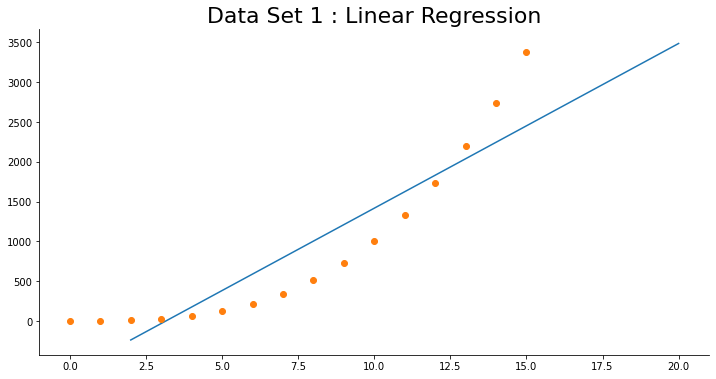

In [77]:
#Get coefficient for linear function
polynomial_coeff = np.polyfit(x1,y1,1)

#Return 100 evenly spaced numbers between 2 and 20 for x axis
xnew= np.linspace(2,20,100)


ynew = np.poly1d(polynomial_coeff)
print("Polynomial Coefficients {}, {}".format(ynew[0], ynew[1]))
fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Data Set 1 : Linear Regression", fontsize = 22);
ax.spines[['right', 'top']].set_visible(False)

#Multiply x values by polynomial coefficient to get new y values
#Plot new x and y values as line against original data points
ax.plot(xnew,ynew(xnew),x1,y1,'o')
plt.show()

As the above plot illustrates, simple linear regression is not capable of modelling the relationship between x1 and y1, as the fit between the straight line and the data points is relatively poor. This is known as underfitting.

Hence, a polynomial function may be more suited to modelling the relationship between our two data sets. However, the more degrees we specify, the higher the risk of overfitting the data. Overfitting is where the model has too many terms for the number of observations, and begins to fit the data exactly. This can mean that the model is describing the random error in the data rather than the actual relationships between the variables. This can cause multiple issues, including misleading coefficients and p-values; it also means that the model will not be able to adapt to new data which is a problem for areas such as machine learning. Therefore, when selecting the number of degrees we should aim to capture the relationship between the variables without overfitting the model.

### 2.2 Polynomial Regression

Below the steps in the previous section are repeated, and the number of degrees is increased to 2. Both data sets are plotted along with the polynomial function to see whether the fit has improved.

#### 2.2.1 Data Set 1

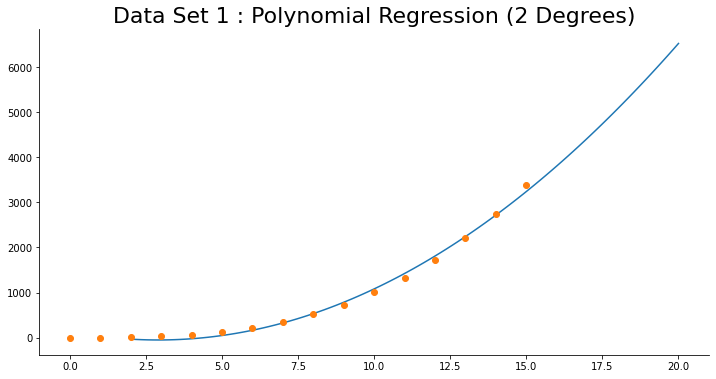

In [105]:
#Get coefficient for linear function
polynomial_coeff = np.polyfit(x1,y1,2)

#Return 100 evenly spaced numbers between 2 and 20 for x axis
xnew= np.linspace(2,20,100)


ynew = np.poly1d(polynomial_coeff)

fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Data Set 1 : Polynomial Regression (2 Degrees)", fontsize = 22);
ax.spines[['right', 'top']].set_visible(False)

#Multiply x values by polynomial coefficient to get new y values
#Plot new x and y values as line against original data points
ax.plot(xnew,ynew(xnew),x1,y1,'o');

The above polynomial appears to fit the datapoints almost perfectly. Therefore, increasing the degrees is unlikely to significantly improve the model and increases the risk of overfitting as our data set is relatively small.

#### 2.2.1 Data Set 1

First, a 2 degree polynomial is used to fit the second data set.

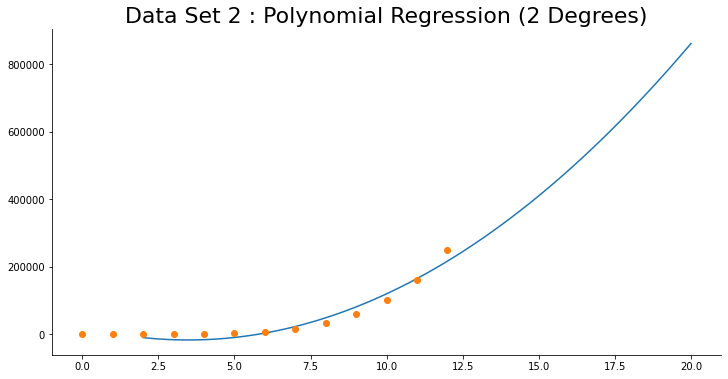

In [119]:
#Get coefficient for linear function
polynomial_coeff = np.polyfit(x2,y2,2)

#Return 100 evenly spaced numbers between 2 and 20 for x axis
xnew= np.linspace(2,20,100)

#Convert correlation coefficient to polynomial function - this can be applied to x values to get the plot for y.
ynew = np.poly1d(polynomial_coeff)


fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Data Set 2 : Polynomial Regression (2 Degrees)", fontsize = 22);
ax.spines[['right', 'top']].set_visible(False)

#Multiply x values by polynomial coefficient to get new y values
#Plot new x and y values as line against original data points
ax.plot(xnew,ynew(xnew),x2,y2,'o');

A 2 degree polynomial function does not fit the data points as well as the first data set; however the relationship between the x and y variables does appear to be represented. We can see the y values begin to increase between x = 7 and 10, this is also captured by the function. 

Below, the data points are fitted with a 3 degree polynomial for comparison.

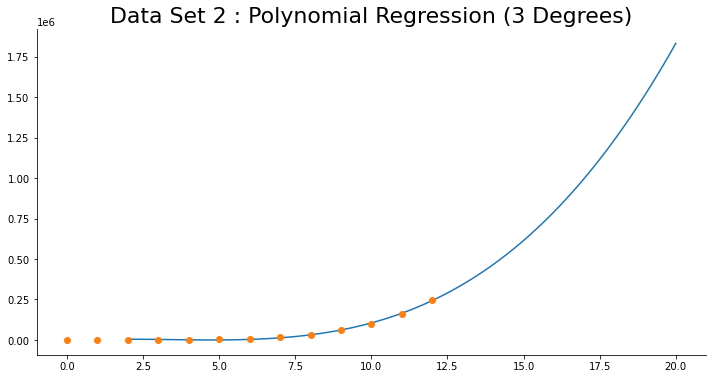

In [118]:
#Get coefficient for linear function
polynomial_coeff = np.polyfit(x2,y2,3)

#Return 100 evenly spaced numbers between 2 and 20 for x axis
xnew= np.linspace(2,20,100)

#Convert correlation coefficient to polynomial function - this can be applied to x values to get the plot for y.
ynew = np.poly1d(polynomial_coeff)


fig, ax = plt.subplots(figsize = (12,6))
ax.set_title("Data Set 2 : Polynomial Regression (3 Degrees)", fontsize = 22);
ax.spines[['right', 'top']].set_visible(False)

#Multiply x values by polynomial coefficient to get new y values
#Plot new x and y values as line against original data points
ax.plot(xnew,ynew(xnew),x2,y2,'o');

We can see that a 3-degree polynomial fits the data points more than the 2-degree.

Hence, we can say that while either a 2 or 3-degree polynomial can be used to describe the relationship between x and y, the 3-degree function is a better model than the 2-degree.